In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import sys, os
import pickle
import imageio
import numpy as np
from skimage import measure

# sys.path.append('../')
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

# check to make sure you set the device
cuda_id = 1
torch.cuda.set_device(cuda_id)

import pylab as p

In [4]:
############ Useful paths
path1='data/boxnet/trainingdata/'
files_list = os.listdir(path1)
path2 = 'data/boxnet/trainingdata2/'
path3 = 'data/boxnet/labels/'
path4 = 'data/boxnet/results/'
PATH = Path('data/boxnet')
IMAGES = 'trainingdata2'

In [25]:
with open(path4+'USSPicker_13_5_0.01_all20_rec2.pickle', 'rb') as handle:
    rec2_8 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.01_all20_prec2.pickle', 'rb') as handle:
    prec2_8 = pickle.load(handle)

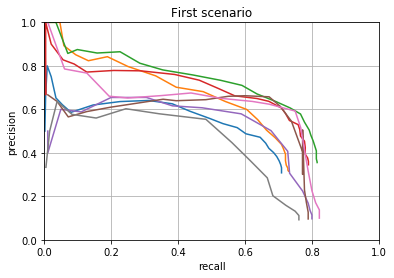

In [27]:
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_1, prec2_1)
ax.plot(rec2_2, prec2_2)
ax.plot(rec2_3, prec2_3)
ax.plot(rec2_4, prec2_4)
ax.plot(rec2_5, prec2_5)
ax.plot(rec2_6, prec2_6)
ax.plot(rec2_7, prec2_7)
ax.plot(rec2_8, prec2_8)
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='First scenario')
ax.grid()

In [7]:
with open(path4+'USSPicker_13_2R_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_13_2R_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_13_2R_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)

0.2602859112951448
0.0
0.0


In [8]:
# prec13_1R = [0.44915, 0.45094, 0.46237, 0.47729, 0.50779, 0.5473,  0.5915,  0.63139, 0.66272, 0.69795, 0.73063, 0.75046, 0.77649,
#  0.79588, 0.8185,  0.83954, 0.84907, 0.86491, 0.87938, 0.89203, 0.90346, 0.91156, 0.92283, 0.92683, 0.92805, 0.94163,
#  0.9462,  0.9441,  0.90566, 0.85714, 0.5]

# rec13_1R = [0.96351, 0.96351, 0.96351, 0.96273 ,0.96196 ,0.96118, 0.96118 ,0.95885 ,0.95652 ,0.95264, 0.95186, 0.94565 ,0.93866,
#  0.92935, 0.92081, 0.90994, 0.88665, 0.86491, 0.83773, 0.80823, 0.77019 ,0.72826, 0.66848, 0.59006 ,0.49068 ,0.37578,
#  0.23214, 0.11801, 0.03727, 0.00466, 0.00078]

prec13_1C = [0.50761, 0.50923 ,0.5168  ,0.54054, 0.5769 , 0.61813 ,0.66195, 0.69921 ,0.73929, 0.76789 ,0.79577 ,0.8231 , 0.84582,
 0.87277 ,0.89619 ,0.91278, 0.92725 ,0.94087 ,0.94751 ,0.95614, 0.96244, 0.9726 , 0.97753 ,0.97877 ,0.97619, 0.97388,
 0.96319 ,0.93333, 0.86207, 0.71429, 0.5    ]

rec13_1C = [0.96154, 0.96154, 0.96154 ,0.96154, 0.96034, 0.95913 ,0.95553 ,0.95553 ,0.95433, 0.95433, 0.95072, 0.95072 ,0.94952,
 0.9399 , 0.93389 ,0.91827, 0.90385 ,0.86058, 0.82452 ,0.78606 ,0.73918 ,0.68269, 0.6274 , 0.55409, 0.44351, 0.3137,
 0.1887  ,0.10096, 0.03005, 0.00601 ,0.0024 ]

prec13_5 = [0.36806, 0.37115,0.39618 ,0.42091, 0.44064 ,0.46096 ,0.4796 , 0.50339 ,0.52766 ,0.5574 , 0.58564 ,0.62597, 0.65938,
 0.7004,  0.73797 ,0.77743 ,0.79775, 0.81747 ,0.84569 ,0.86376, 0.88417 ,0.88953, 0.86869 ,0.88462, 0.93103, 0.90476,
 0.77778 ,0.66667]

rec13_5 = [0.82298, 0.82298, 0.8222,  0.8222 , 0.81832, 0.81599, 0.81211, 0.80668, 0.79969, 0.78416 ,0.77252, 0.75233 ,0.72593,
 0.68789 ,0.64286, 0.57764, 0.49612 ,0.40683, 0.32764 ,0.24612 ,0.1778  ,0.11879, 0.06677, 0.03571, 0.02096, 0.01475,
 0.00543 ,0.00155]

prec13_2 = [0.37041 ,0.37734 ,0.4033 , 0.42466, 0.44329, 0.46084, 0.47841, 0.50075, 0.52144, 0.54701, 0.57475, 0.60598, 0.63715,
 0.66749, 0.70549 ,0.73807 ,0.76132 ,0.79825 ,0.82169 ,0.82609 ,0.84574, 0.85833 ,0.85  ,  0.80488, 0.73913 ,0.83333,
 0.66667, 1.     ]

rec13_2 = [0.79891 ,0.79891, 0.79814 ,0.79425, 0.79193, 0.78571 ,0.78261 ,0.77795 ,0.77407 ,0.76786 ,0.74922 ,0.7236 , 0.68711,
 0.63276 ,0.5691 , 0.49224, 0.4309 , 0.35326 ,0.26475 ,0.19177 ,0.12345 ,0.07997 ,0.0396,  0.02562 ,0.0132 , 0.00776,
 0.00311, 0.00078]

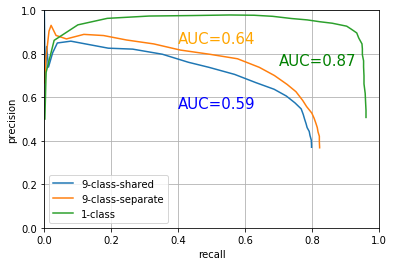

In [9]:
import pylab as p
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec3, prec3,rec13_1C, prec13_1C)
# ax.plot(rec3, prec3, label='1R')
ax.plot(rec13_2, prec13_2, label='9-class-shared')
ax.plot(rec13_5, prec13_5, label='9-class-separate')
ax.plot(rec13_1C, prec13_1C, label='1-class')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision')#, title='Trained and tested on the same dataset.')
# phase field equations
plt.text(0.4, 0.55,
         'AUC=0.59',
         {'color': 'b', 'fontsize': 15})
plt.text(0.4, 0.85,
         'AUC=0.64',
         {'color': 'orange', 'fontsize': 15})
plt.text(0.7, 0.75,
         'AUC=0.87',
         {'color': 'g', 'fontsize': 15})
ax.grid()
ax.legend()

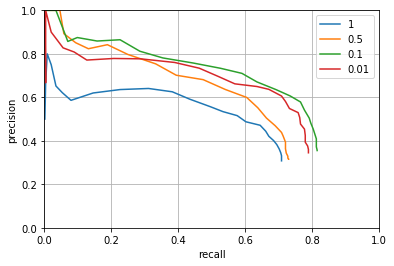

In [29]:
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec3, prec3,rec13_1C, prec13_1C)
# ax.plot(rec3, prec3, label='1R')
ax.plot(rec2_1, prec2_1, label='1')
ax.plot(rec2_2, prec2_2, label='0.5')
ax.plot(rec2_3, prec2_3, label='0.1')
ax.plot(rec2_4, prec2_4, label='0.01')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision')#, title='Trained and tested on the same dataset.')
# plt.text(0.4, 0.55,
#          'AUC=0.59',
#          {'color': 'b', 'fontsize': 15})
# plt.text(0.4, 0.85,
#          'AUC=0.64',
#          {'color': 'orange', 'fontsize': 15})
# plt.text(0.7, 0.75,
#          'AUC=0.87',
#          {'color': 'g', 'fontsize': 15})
ax.grid()
ax.legend()

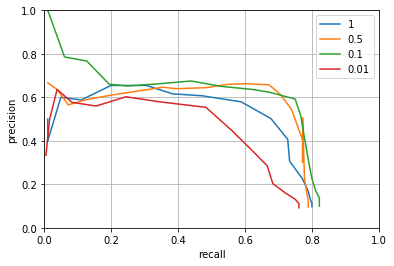

In [30]:
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
# ax.plot(rec3, prec3,rec13_1C, prec13_1C)
# ax.plot(rec3, prec3, label='1R')
ax.plot(rec2_5, prec2_5, label='1')
ax.plot(rec2_6, prec2_6, label='0.5')
ax.plot(rec2_7, prec2_7, label='0.1')
ax.plot(rec2_8, prec2_8, label='0.01')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision')#, title='Trained and tested on the same dataset.')
# plt.text(0.4, 0.55,
#          'AUC=0.59',
#          {'color': 'b', 'fontsize': 15})
# plt.text(0.4, 0.85,
#          'AUC=0.64',
#          {'color': 'orange', 'fontsize': 15})
# plt.text(0.7, 0.75,
#          'AUC=0.87',
#          {'color': 'g', 'fontsize': 15})
ax.grid()
ax.legend()

# Experiment 1:
(13_1C on 10078 only)

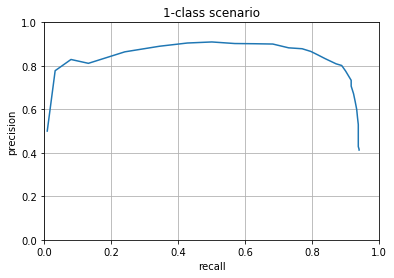

In [5]:
with open(path4+'USSPicker_13_1C_10078_rec2.pickle', 'rb') as handle:
    rec2 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_10078_prec2.pickle', 'rb') as handle:
    prec2 = pickle.load(handle)
    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2, prec2)
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='1-class scenario')
ax.grid()

In [16]:
with open(path4+'USSPicker_13_1C_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_13_1C_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)

0.7966730943725384
0.8076459237883024
0.3623322733969907


# Experiment 2:

In [42]:
# values = [0.01, 0.05, 0.1, 0.125, 0.25, 0.5, 1]
values = [0.01, 0.05, 0.075, 0.1, 0.125, 0.1875, 0.25, 0.375, 0.5, 0.75, 1]
aucs_10078 = []
aucs_all20 = []
for i in values:
    with open(path4+"USSPicker_13_5_" + str(i) + "_all20_auc.pickle", 'rb') as handle:
        aucs_all20.append(pickle.load(handle))
    with open(path4+"USSPicker_13_5_" + str(i) + "_10078_auc.pickle", 'rb') as handle:
        aucs_10078.append(pickle.load(handle))

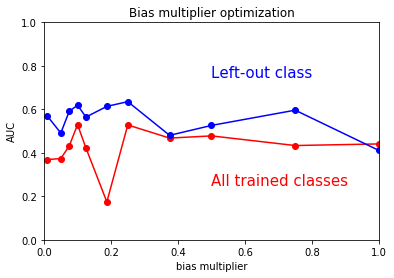

In [43]:
plt.plot(values, aucs_all20, 'ro-')
plt.plot(values, aucs_10078, 'bo-')
plt.axis([0, 1, 0, 1])
plt.text(0.5, 0.25,
         'All trained classes',
         {'color': 'r', 'fontsize': 15})
plt.text(0.5, 0.75,
         'Left-out class',
         {'color': 'b', 'fontsize': 15})
plt.xlabel('bias multiplier')
plt.ylabel('AUC')
plt.title('Bias multiplier optimization')
plt.show()

# Experiment3:

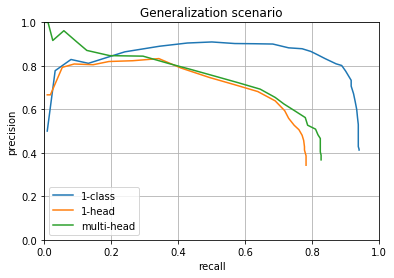

In [104]:
with open(path4+'USSPicker_13_1C_10078_rec2.pickle', 'rb') as handle:
    rec2_1 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_10078_prec2.pickle', 'rb') as handle:
    prec2_1 = pickle.load(handle)
    
with open(path4+'USSPicker_13_2C_10078_rec2.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'USSPicker_13_2C_10078_prec2.pickle', 'rb') as handle:
    prec2_2 = pickle.load(handle)
    
with open(path4+'USSPicker_13_5_0.25_10078_rec2.pickle', 'rb') as handle:
    rec2_3 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_10078_prec2.pickle', 'rb') as handle:
    prec2_3 = pickle.load(handle)
    

    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_1, prec2_1, label='1-class')
ax.plot(rec2_2, prec2_2, label='1-head')
ax.plot(rec2_3, prec2_3, label="multi-head")
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Generalization scenario')
ax.grid()
ax.legend()

In [105]:
with open(path4+'USSPicker_13_1C_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_13_1C_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)
print("\n")

with open(path4+'USSPicker_13_2C_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_13_2C_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_13_2C_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)
print("\n")

with open(path4+'USSPicker_13_5_0.25_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)

# 0.797
# 0.575
# 0.635

# 0.777
# 0
# 0

# 0.684
# 0
# 0.106

0.7966730943725384
0.8076459237883024
0.3623322733969907


0.5745836957072641
0.0
0.0


0.6352875372653157
0.0
0.3445078644370915


In [46]:
rec2_1

array([0.00946, 0.0331 , 0.08038, 0.13239, 0.24113, 0.34515, 0.4279 , 0.50118, 0.56974, 0.62884, 0.68322,
       0.7305 , 0.77069, 0.79669, 0.81797, 0.83924, 0.87234, 0.88889, 0.90071, 0.91726, 0.91726, 0.92435,
       0.92908, 0.93381, 0.93617, 0.93853, 0.93853, 0.93853, 0.93853, 0.9409 , 0.9409 ], dtype=float32)

In [47]:
prec2_1

array([0.5    , 0.77778, 0.82927, 0.81159, 0.86441, 0.89024, 0.905  , 0.90987, 0.90262, 0.90169, 0.90031,
       0.88286, 0.87871, 0.86632, 0.85012, 0.83333, 0.80921, 0.80171, 0.77597, 0.73346, 0.70674, 0.67182,
       0.63695, 0.59939, 0.5625 , 0.53004, 0.48771, 0.45423, 0.42873, 0.41632, 0.41286], dtype=float32)

In [106]:
auc = 0

prec_at_rec90 = np.zeros(2)
prec_aft_rec90 = np.zeros(2)
prec_aft_rec90[0] = 1
prec_bef_rec90 = np.zeros(2)

rec_at_prec90 = np.zeros(2)
rec_aft_prec90 = np.zeros(2)
rec_aft_prec90[0] = 1
rec_bef_prec90 = np.zeros(2)

rec_aft_prec90_flag = 0

for i in range(len(rec2_1) - 1):
    auc += ((prec2_1[i] + prec2_1[i + 1]) / 2) * (rec2_1[i + 1] - rec2_1[i])
    if rec2_1[i + 1] == 0.9:
        if prec2_1[i + 1] > prec_at_rec90[1]:
            prec_at_rec90[0] = rec2_1[i + 1]
            prec_at_rec90[1] = prec2_1[i + 1]
    elif rec2_1[i + 1] > 0.9:
        if rec2_1[i + 1] < prec_aft_rec90[0]:
            prec_aft_rec90[0] = rec2_1[i + 1]
            prec_aft_rec90[1] = prec2_1[i + 1]
    elif rec2_1[i + 1] < 0.9:
        if rec2_1[i + 1] > prec_bef_rec90[0]:
            prec_bef_rec90[0] = rec2_1[i + 1]
            prec_bef_rec90[1] = prec2_1[i + 1]

    if prec2_1[i + 1] == 0.9:
        if rec2_1[i + 1] > rec_at_prec90[1]:
            rec_at_prec90[0] = prec2_1[i + 1]
            rec_at_prec90[1] = rec2_1[i + 1]
    elif prec2_1[i + 1] > 0.9:
        # if prec2_1[i + 1] < rec_aft_prec90[0]:
        rec_aft_prec90[0] = prec2_1[i + 1]
        rec_aft_prec90[1] = rec2_1[i + 1]
        rec_aft_prec90_flag = 1
    elif prec2_1[i + 1] < 0.9:
        if rec_aft_prec90_flag == 1:
            rec_bef_prec90[0] = prec2_1[i + 1]
            rec_bef_prec90[1] = rec2_1[i + 1]
        rec_aft_prec90_flag = 0
if prec_at_rec90[0] == 0:
    if prec_aft_rec90[0] < 1:
        range_bef = 0.9 - prec_bef_rec90[0]
        range_aft = prec_aft_rec90[0] - 0.9
        prec_at_rec90[1] = (range_bef * prec_bef_rec90[1] + range_aft * prec_aft_rec90[1]) / (range_bef + range_aft)
    else:
        prec_at_rec90[1] = 0

if rec_at_prec90[0] == 0:
    if rec_aft_prec90[0] < 1:
        range_bef = 0.9 - rec_bef_prec90[0]
        range_aft = rec_aft_prec90[0] - 0.9
        rec_at_prec90[1] = (range_bef * rec_bef_prec90[1] + range_aft * rec_aft_prec90[1]) / (range_bef + range_aft)
    else:
        rec_at_prec90[1] = 0

print(auc)
print(prec_at_rec90[1])
print(rec_at_prec90[1])

0.7966730943725384
0.8001614917097174
0.7296525788900478


# Experiment4:

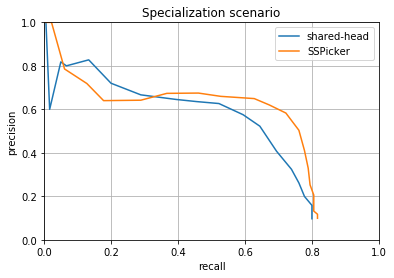

In [44]:
with open(path4+'USSPicker_13_2C_all20_rec2.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'USSPicker_13_2C_all20_prec2.pickle', 'rb') as handle:
    prec2_2 = pickle.load(handle)
    
with open(path4+'USSPicker_13_5_0.25_all20_rec2.pickle', 'rb') as handle:
    rec2_3 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_all20_prec2.pickle', 'rb') as handle:
    prec2_3 = pickle.load(handle)
    

    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_2, prec2_2, label='shared-head')
ax.plot(rec2_3, prec2_3, label='SSPicker')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Specialization scenario')
ax.grid()
ax.legend()

In [30]:
with open(path4+'USSPicker_13_2C_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_13_2C_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_13_2C_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)
print("\n")

with open(path4+'USSPicker_13_5_0.25_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)

0.48862542006972143
0.0
0.0


0.5282091946033196
0.0
0.0


# appendix

In [35]:
# values = [0.01, 0.05, 0.1, 0.125, 0.25, 0.5, 1]
values = ['0.25', '0.25g', '0.25g16', '0.25g8']
aucs_10078 = []
aucs_all20 = []
for i in values:
    with open(path4+"USSPicker_13_5_" + i + "_all20_auc.pickle", 'rb') as handle:
        aucs_all20.append(pickle.load(handle))
    with open(path4+"USSPicker_13_5_" + str(i) + "_10078_auc.pickle", 'rb') as handle:
        aucs_10078.append(pickle.load(handle))

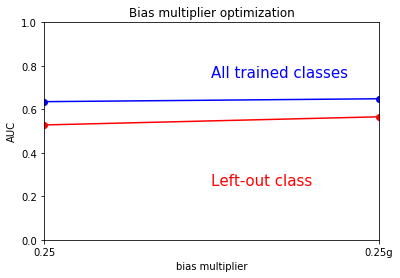

In [36]:
plt.plot(values, aucs_all20, 'ro-')
plt.plot(values, aucs_10078, 'bo-')
plt.axis([0, 1, 0, 1])
plt.text(0.5, 0.75,
         'All trained classes',
         {'color': 'b', 'fontsize': 15})
plt.text(0.5, 0.25,
         'Left-out class',
         {'color': 'r', 'fontsize': 15})
plt.xlabel('bias multiplier')
plt.ylabel('AUC')
plt.title('Bias multiplier optimization')
plt.show()

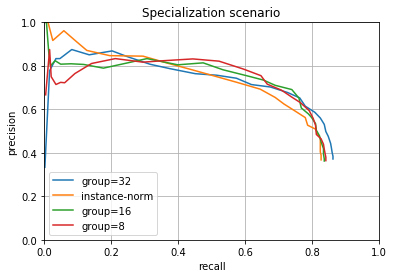

In [40]:
with open(path4+'USSPicker_13_5_0.25g_10078_rec2.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g_10078_prec2.pickle', 'rb') as handle:
    prec2_2 = pickle.load(handle)

with open(path4+'USSPicker_13_5_0.25g16_10078_rec2.pickle', 'rb') as handle:
    rec2_4 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g16_10078_prec2.pickle', 'rb') as handle:
    prec2_4 = pickle.load(handle)

with open(path4+'USSPicker_13_5_0.25g8_10078_rec2.pickle', 'rb') as handle:
    rec2_5 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g8_10078_prec2.pickle', 'rb') as handle:
    prec2_5 = pickle.load(handle)
    
    
with open(path4+'USSPicker_13_5_0.25_10078_rec2.pickle', 'rb') as handle:
    rec2_3 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_10078_prec2.pickle', 'rb') as handle:
    prec2_3 = pickle.load(handle)
    

    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_2, prec2_2, label='group=32')
ax.plot(rec2_3, prec2_3, label='instance-norm')
ax.plot(rec2_4, prec2_4, label='group=16')
ax.plot(rec2_5, prec2_5, label='group=8')


ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Specialization scenario')
ax.grid()
ax.legend()

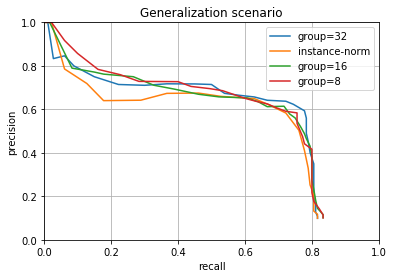

In [117]:
with open(path4+'USSPicker_13_5_0.25g_all20_rec2.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g_all20_prec2.pickle', 'rb') as handle:
    prec2_2 = pickle.load(handle)

with open(path4+'USSPicker_13_5_0.25g16_all20_rec2.pickle', 'rb') as handle:
    rec2_4 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g16_all20_prec2.pickle', 'rb') as handle:
    prec2_4 = pickle.load(handle)

with open(path4+'USSPicker_13_5_0.25g8_all20_rec2.pickle', 'rb') as handle:
    rec2_5 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g8_all20_prec2.pickle', 'rb') as handle:
    prec2_5 = pickle.load(handle)
    
    
with open(path4+'USSPicker_13_5_0.25_all20_rec2.pickle', 'rb') as handle:
    rec2_3 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_all20_prec2.pickle', 'rb') as handle:
    prec2_3 = pickle.load(handle)
    

    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_2, prec2_2, label='group=32')
ax.plot(rec2_3, prec2_3, label='instance-norm')
ax.plot(rec2_4, prec2_4, label='group=16')
ax.plot(rec2_5, prec2_5, label='group=8')


ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Generalization scenario')
ax.grid()
ax.legend()

In [119]:
with open(path4+'USSPicker_13_5_0.25_all20_auc.pickle', 'rb') as handle:
    rec2_3 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g_all20_auc.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g16_all20_auc.pickle', 'rb') as handle:
    rec2_4 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25g8_all20_auc.pickle', 'rb') as handle:
    rec2_5 = pickle.load(handle)
print(rec2_3)
print(rec2_2)
print(rec2_4)
print(rec2_5)

0.5282091946033196
0.565627689415436
0.562140012984802
0.575891111157927


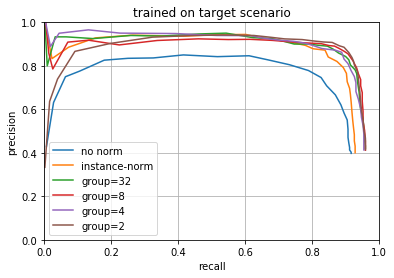

In [116]:
with open(path4+'USSPicker_13_1C_nobn_10078_rec2.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_nobn_10078_prec2.pickle', 'rb') as handle:
    prec2_2 = pickle.load(handle)

with open(path4+'USSPicker_13_1C_bn_10078_rec2.pickle', 'rb') as handle:
    rec2_4 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_bn_10078_prec2.pickle', 'rb') as handle:
    prec2_4 = pickle.load(handle)

with open(path4+'USSPicker_13_1C_gn_10078_rec2.pickle', 'rb') as handle:
    rec2_5 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_gn_10078_prec2.pickle', 'rb') as handle:
    prec2_5 = pickle.load(handle)
    
with open(path4+'USSPicker_13_1C_gn8_10078_rec2.pickle', 'rb') as handle:
    rec2_6 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_gn8_10078_prec2.pickle', 'rb') as handle:
    prec2_6 = pickle.load(handle)
    
with open(path4+'USSPicker_13_1C_gn4_10078_rec2.pickle', 'rb') as handle:
    rec2_7 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_gn4_10078_prec2.pickle', 'rb') as handle:
    prec2_7 = pickle.load(handle)

with open(path4+'USSPicker_13_1C_gn2_10078_rec2.pickle', 'rb') as handle:
    rec2_8 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_gn2_10078_prec2.pickle', 'rb') as handle:
    prec2_8 = pickle.load(handle)

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_2, prec2_2, label='no norm')
ax.plot(rec2_4, prec2_4, label='instance-norm')
ax.plot(rec2_5, prec2_5, label='group=32')
ax.plot(rec2_6, prec2_6, label='group=8')
ax.plot(rec2_7, prec2_7, label='group=4')
ax.plot(rec2_8, prec2_8, label='group=2')


ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='trained on target scenario')
ax.grid()
ax.legend()

In [111]:
with open(path4+'USSPicker_13_1C_nobn_10078_auc.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_bn_10078_auc.pickle', 'rb') as handle:
    rec2_4 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_gn_10078_auc.pickle', 'rb') as handle:
    rec2_5 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_gn8_10078_auc.pickle', 'rb') as handle:
    rec2_6 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_gn4_10078_auc.pickle', 'rb') as handle:
    rec2_7 = pickle.load(handle)
with open(path4+'USSPicker_13_1C_gn2_10078_auc.pickle', 'rb') as handle:
    rec2_8 = pickle.load(handle)
print(rec2_2)
print(rec2_4)
print(rec2_5)
print(rec2_6)
print(rec2_7)
print(rec2_8)

0.7209422109026
0.8404187884157168
0.8728301319607068
0.8580242342285049
0.8745751694100445
0.8539411604730769


# Known target

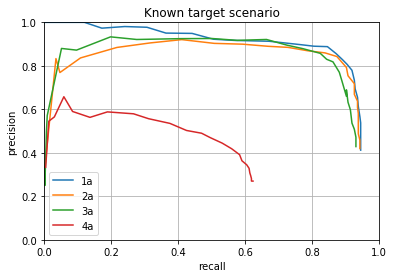

In [157]:
with open(path4+'SSPicker_18_1a_c1_10078_rec2.pickle', 'rb') as handle:
    rec2_1 = pickle.load(handle)
with open(path4+'SSPicker_18_1a_c1_10078_prec2.pickle', 'rb') as handle:
    prec2_1 = pickle.load(handle)

with open(path4+'SSPicker_18_2a_10078_rec2.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'SSPicker_18_2a_10078_prec2.pickle', 'rb') as handle:
    prec2_2 = pickle.load(handle)
    
with open(path4+'SSPicker_18_3a_10078_rec2.pickle', 'rb') as handle:
    rec2_3 = pickle.load(handle)
with open(path4+'SSPicker_18_3a_10078_prec2.pickle', 'rb') as handle:
    prec2_3 = pickle.load(handle)    

with open(path4+'SSPicker_18_4a_10078_rec2.pickle', 'rb') as handle:
    rec2_4 = pickle.load(handle)
with open(path4+'SSPicker_18_4a_10078_prec2.pickle', 'rb') as handle:
    prec2_4 = pickle.load(handle)
    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_1, prec2_1, label='1a')
ax.plot(rec2_2, prec2_2, label='2a')
ax.plot(rec2_3, prec2_3, label='3a')
ax.plot(rec2_4, prec2_4, label='4a')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Known target scenario')
ax.grid()
ax.legend()

In [134]:
with open(path4+'SSPicker_18_1a_c1_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_18_1a_c1_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_18_1a_c1_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)
print('\n')

with open(path4+'SSPicker_18_2a_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_18_2a_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_18_2a_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print(auc)
print(prec_at_rec90)
print(rec_at_prec90)
print('\n')

# with open(path4+'SSPicker_18_3a_10078_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_18_3a_10078_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_18_3a_10078_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# print(auc)
# print(prec_at_rec90)
# print(rec_at_prec90)
# print('\n')

# with open(path4+'SSPicker_18_4a_10078_auc.pickle', 'rb') as handle:
#     auc = pickle.load(handle)
# with open(path4+'SSPicker_18_4a_10078_prec_at_rec90.pickle', 'rb') as handle:
#     prec_at_rec90 = pickle.load(handle)
# with open(path4+'SSPicker_18_4a_10078_rec_at_prec90.pickle', 'rb') as handle:
#     rec_at_prec90 = pickle.load(handle)
# print(auc)
# print(prec_at_rec90)
# print(rec_at_prec90)

0.8777435173939736
0.8580366564081525
0.8590413694347434


0.8097590267070613
0.8493515686184834
0.873492269201228




# Uknown target

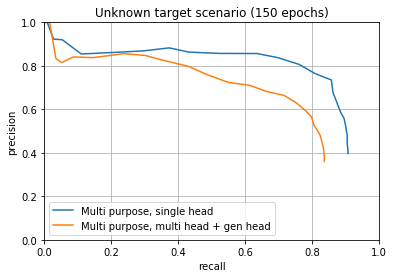

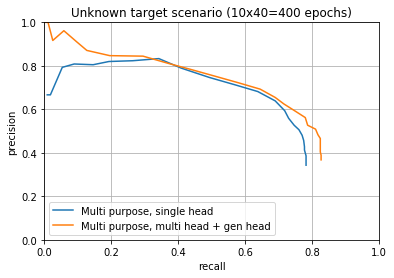

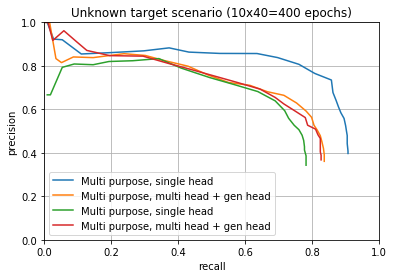

In [154]:
with open(path4+'SSPicker_18_2b_10078_rec2.pickle', 'rb') as handle:
    rec2_1 = pickle.load(handle)
with open(path4+'SSPicker_18_2b_10078_prec2.pickle', 'rb') as handle:
    prec2_1 = pickle.load(handle)

with open(path4+'SSPicker_18_3b_10078_rec2.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'SSPicker_18_3b_10078_prec2.pickle', 'rb') as handle:
    prec2_2 = pickle.load(handle)    

with open(path4+'SSPicker_18_4b_10078_rec2.pickle', 'rb') as handle:
    rec2_3 = pickle.load(handle)
with open(path4+'SSPicker_18_4b_10078_prec2.pickle', 'rb') as handle:
    prec2_3 = pickle.load(handle)

with open(path4+'USSPicker_13_2C_10078_rec2.pickle', 'rb') as handle:
    rec2_4 = pickle.load(handle)
with open(path4+'USSPicker_13_2C_10078_prec2.pickle', 'rb') as handle:
    prec2_4 = pickle.load(handle)
    
with open(path4+'USSPicker_13_5_0.25_10078_rec2.pickle', 'rb') as handle:
    rec2_5 = pickle.load(handle)
with open(path4+'USSPicker_13_5_0.25_10078_prec2.pickle', 'rb') as handle:
    prec2_5 = pickle.load(handle)
    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_1, prec2_1, label='Multi purpose, single head')
# ax.plot(rec2_2, prec2_2, label="Multi purpose, multi head, no gen head")
ax.plot(rec2_3, prec2_3, label='Multi purpose, multi head + gen head')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Unknown target scenario (150 epochs)')
ax.grid()
ax.legend()

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_4, prec2_4, label='Multi purpose, single head')
ax.plot(rec2_5, prec2_5, label='Multi purpose, multi head + gen head')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Unknown target scenario (10x40=400 epochs)')
ax.grid()
ax.legend()

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_1, prec2_1, label='Multi purpose, single head')
# ax.plot(rec2_2, prec2_2, label="Multi purpose, multi head, no gen head")
ax.plot(rec2_3, prec2_3, label='Multi purpose, multi head + gen head')
ax.plot(rec2_4, prec2_4, label='Multi purpose, single head')
ax.plot(rec2_5, prec2_5, label='Multi purpose, multi head + gen head')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Unknown target scenario (10x40=400 epochs)')
ax.grid()
ax.legend()

In [124]:
with open(path4+'USSPicker_15_2b_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_15_2b_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_15_2b_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print('Multi purpose, single head')
print("AUC: ", auc)
print("Precision at recall=90: ", prec_at_rec90)
print("Recall at precision=90: ", rec_at_prec90)
print("\n")

with open(path4+'SSPicker_15_4b_10078_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_15_4b_10078_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_15_4b_10078_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print('Multi purpose, multi head + gen head')
print("AUC: ", auc)
print("Precision at recall=90: ", prec_at_rec90)
print("Recall at precision=90: ", rec_at_prec90)
print("\n")

Multi purpose, single head
AUC:  0.7306603877892983
Precision at recall=90:  0.0
Recall at precision=90:  0.9078926313054995


Multi purpose, multi head + gen head
AUC:  0.4948009946171688
Precision at recall=90:  0.0
Recall at precision=90:  0.0




# Multi target

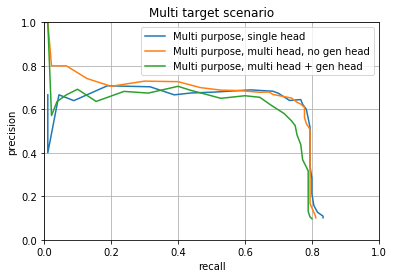

In [126]:
with open(path4+'USSPicker_15_2b_all20_rec2.pickle', 'rb') as handle:
    rec2_1 = pickle.load(handle)
with open(path4+'USSPicker_15_2b_all20_prec2.pickle', 'rb') as handle:
    prec2_1 = pickle.load(handle)
    
with open(path4+'SSPicker_15_3b_all20_rec2.pickle', 'rb') as handle:
    rec2_3 = pickle.load(handle)
with open(path4+'SSPicker_15_3b_all20_prec2.pickle', 'rb') as handle:
    prec2_3 = pickle.load(handle)

    
with open(path4+'SSPicker_15_4b_all20_rec2.pickle', 'rb') as handle:
    rec2_2 = pickle.load(handle)
with open(path4+'SSPicker_15_4b_all20_prec2.pickle', 'rb') as handle:
    prec2_2 = pickle.load(handle)

    
fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_1, prec2_1, label='Multi purpose, single head')
ax.plot(rec2_3, prec2_3, label='Multi purpose, multi head, no gen head')
ax.plot(rec2_2, prec2_2, label='Multi purpose, multi head + gen head')
ax.axis([0,1,0,1])
ax.set(xlabel='recall', ylabel='precision',
       title='Multi target scenario')
ax.grid()
ax.legend()

In [129]:
with open(path4+'USSPicker_15_2b_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'USSPicker_15_2b_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'USSPicker_15_2b_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print('Multi purpose, single head')
print("AUC: ", auc)
print("Precision at recall=90: ", prec_at_rec90)
print("Recall at precision=90: ", rec_at_prec90)
print("\n")

with open(path4+'SSPicker_15_3b_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_15_3b_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_15_3b_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print('Multi purpose, multi head, no gen head')
print("AUC: ", auc)
print("Precision at recall=90: ", prec_at_rec90)
print("Recall at precision=90: ", rec_at_prec90)
print("\n")

with open(path4+'SSPicker_15_4b_all20_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_15_4b_all20_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_15_4b_all20_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
print('Multi purpose, multi head + gen head')
print("AUC: ", auc)
print("Precision at recall=90: ", prec_at_rec90)
print("Recall at precision=90: ", rec_at_prec90)
print("\n")

Multi purpose, single head
AUC:  0.5318696883007552
Precision at recall=90:  0.0
Recall at precision=90:  0.0


Multi purpose, multi head, no gen head
AUC:  0.5637004988821984
Precision at recall=90:  0.0
Recall at precision=90:  0.0


Multi purpose, multi head + gen head
AUC:  0.5107547458103984
Precision at recall=90:  0.0
Recall at precision=90:  0.0


